In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
stocks_df = pd.read_csv('stock_sentiment.csv')

In [3]:
stocks_df.head()

Text  Sentiment
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2  user I'd be afraid to short AMZN - they are lo...          1
3                                  MNTA Over 12.00            1
4                                   OI  Over 21.37            1

In [4]:
stocks_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

In [5]:
stocks_df['Sentiment'].unique()

array([1, 0], dtype=int64)

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
def punct(text):
    text_punc = []
    for char in text:
        if char  not in string.punctuation:
            text_punc.append(char)
        text_joined  = ''.join(text_punc)  
    return text_joined
    


       


In [8]:
stocks_df['text without punct'] = stocks_df['Text'].apply(punct)

In [9]:
stocks_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                     text without punct  
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...  
1     user AAP MOVIE 55 return for the FEAGEED indic...  
2     user Id be afraid to short AMZN  they are look...  
3                                      MNTA Over 1200    
4                                       OI  Over 2137    
...                                                 ...  
5786  Industry body CII said discoms are likely to s...  
5787  Gold prices slip below Rs 46000 as investors b...  
5788  Workers at Bajaj Auto have agreed to a 10 wage...  
5789  Sharemarket LIVE Sensex off day’s high up 600 ...  
5790  Sensex Nifty climb off days highs still up 2 K...  

[5791 rows x 3 columns]

In [10]:
nltk.download("stopwords")
#stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year','https'])

In [12]:

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >=3 and token not in stop_words:
            result.append(token)
    return result        
            

In [13]:
stocks_df['text without punct and stopwords'] = stocks_df['text without punct'].apply(preprocess)

In [14]:
stocks_df

Text  Sentiment  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2     user I'd be afraid to short AMZN - they are lo...          1   
3                                     MNTA Over 12.00            1   
4                                      OI  Over 21.37            1   
...                                                 ...        ...   
5786  Industry body CII said #discoms are likely to ...          0   
5787  #Gold prices slip below Rs 46,000 as #investor...          0   
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1   
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1   
5790  #Sensex, #Nifty climb off day's highs, still u...          1   

                                     text without punct  \
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1     user AAP MOVIE 55 return for the FEAGEED indic...   
2     user Id be afraid to short AMZN  they are look...   
3                                      MNTA Over 1200     
4                                       OI  Over 2137     
...                                                 ...   
5786  Industry body CII said discoms are likely to s...   
5787  Gold prices slip below Rs 46000 as investors b...   
5788  Workers at Bajaj Auto have agreed to a 10 wage...   
5789  Sharemarket LIVE Sensex off day’s high up 600 ...   
5790  Sensex Nifty climb off days highs still up 2 K...   

                       text without punct and stopwords  
0     [kickers, watchlist, xide, tit, soq, pnk, cpw,...  
1     [movie, return, feageed, indicator, trades, aw...  
2     [afraid, short, amzn, looking, like, nearmonop...  
3                                                [mnta]  
4                                                    []  
...                                                 ...  
5786  [industry, body, cii, said, discoms, likely, s...  
5787  [gold, prices, slip, investors, book, profits,...  
5788  [workers, bajaj, auto, agreed, wage, cut, peri...  
5789  [sharemarket, live, sensex, high, points, nift...  
5790  [sensex, nifty, climb, days, highs, still, key...  

[5791 rows x 4 columns]

In [15]:
stocks_df['Text Without Punct & Stopwords Joined'] = stocks_df['text without punct and stopwords'].apply(lambda x: " ".join(x))

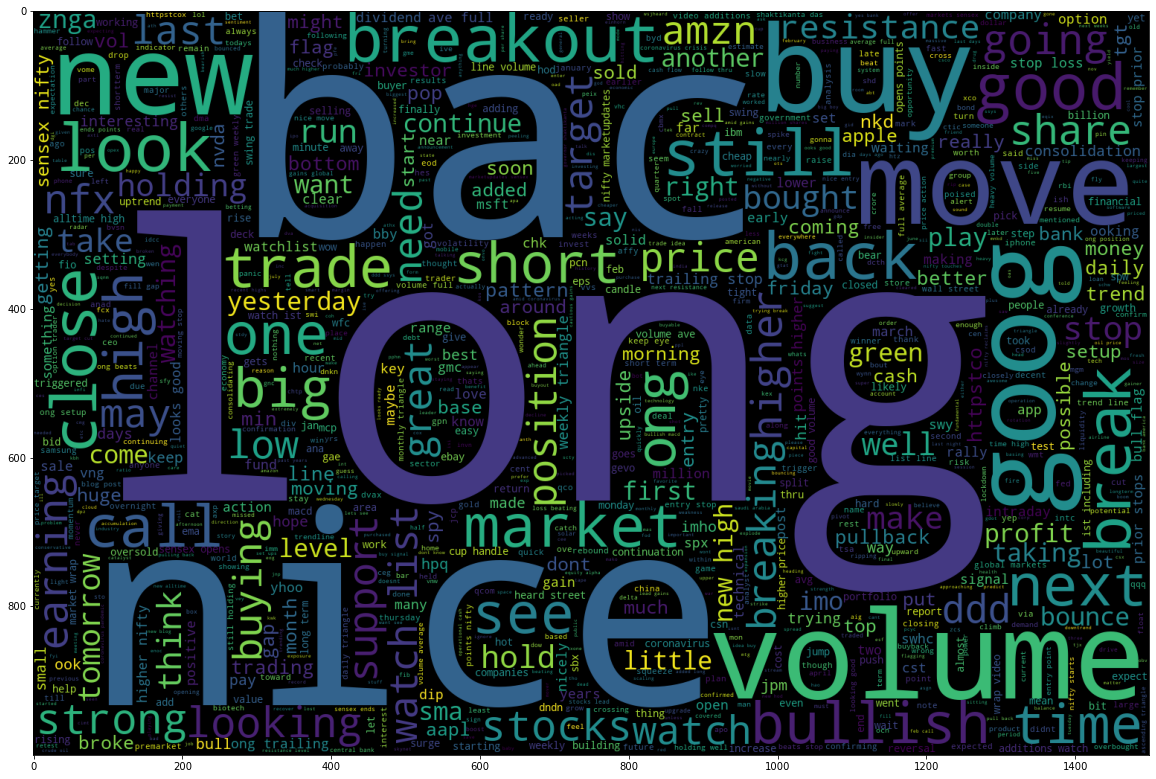

In [16]:
# for positive sentiment
plt.figure(figsize = (20,20))
wc1 = WordCloud(max_words=1000,height=1000,width= 1500).generate(" ".join(stocks_df[stocks_df['Sentiment'] ==1]['Text Without Punct & Stopwords Joined']))
plt.imshow(wc1)

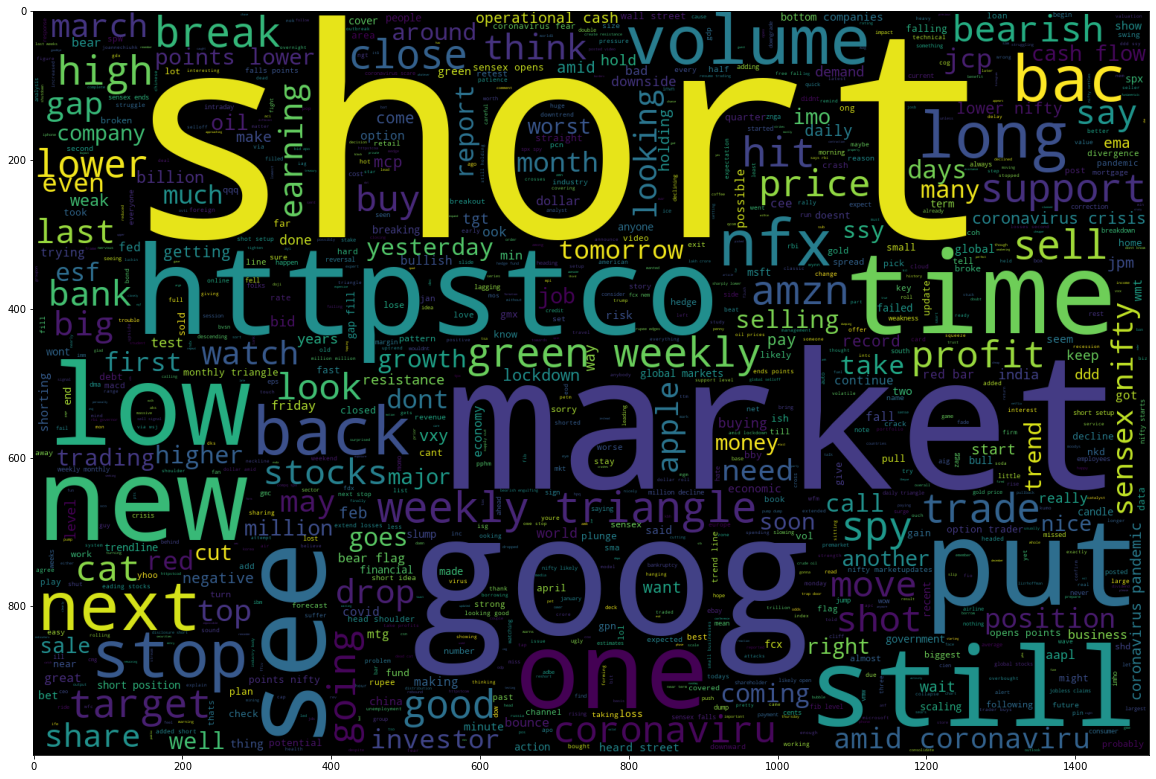

In [17]:
#for negative sentiment
wc2 = WordCloud(max_words=1000,height=1000,width= 1500).generate(" ".join(stocks_df[stocks_df['Sentiment'] ==0]['Text Without Punct & Stopwords Joined']))
plt.figure(figsize = (20,20))
plt.imshow(wc2)

In [18]:
nltk.download('punkt')
stocks_df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text  Sentiment  \
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1   
1  user: AAP MOVIE. 55% return for the FEA/GEED i...          1   
2  user I'd be afraid to short AMZN - they are lo...          1   
3                                  MNTA Over 12.00            1   
4                                   OI  Over 21.37            1   

                                  text without punct  \
0  Kickers on my watchlist XIDE TIT SOQ PNK CPW B...   
1  user AAP MOVIE 55 return for the FEAGEED indic...   
2  user Id be afraid to short AMZN  they are look...   
3                                   MNTA Over 1200     
4                                    OI  Over 2137     

                    text without punct and stopwords  \
0  [kickers, watchlist, xide, tit, soq, pnk, cpw,...   
1  [movie, return, feageed, indicator, trades, aw...   
2  [afraid, short, amzn, looking, like, nearmonop...   
3                                             [mnta]   
4                                                 []   

               Text Without Punct & Stopwords Joined  
0  kickers watchlist xide tit soq pnk cpw bpz tra...  
1      movie return feageed indicator trades awesome  
2  afraid short amzn looking like nearmonopoly eb...  
3                                               mnta  
4

In [19]:
nltk.word_tokenize(stocks_df['Text Without Punct & Stopwords Joined'][0])

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [20]:
maxlen = -1
for doc in stocks_df['Text Without Punct & Stopwords Joined']:
    token = nltk.word_tokenize(doc)
    if (len(token) > maxlen):
        maxlen = len(token)
        

In [21]:
maxlen

20

In [22]:
tweet_length = [ len(nltk.word_tokenize(doc)) for doc in stocks_df['Text Without Punct & Stopwords Joined']]

In [23]:
fig = px.histogram(x = tweet_length,  nbins=50)
fig.show()


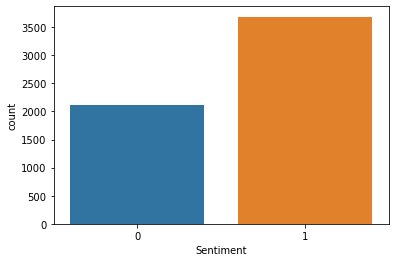

In [24]:
ax = sns.countplot(x='Sentiment', data=stocks_df)

In [25]:
list_of_words = []
for i in stocks_df['text without punct and stopwords']:
    for j in i:
        list_of_words.append(j)
        

In [26]:
total_words = len(list(set(list_of_words)))
total_words

9268

In [27]:
X = stocks_df['text without punct and stopwords']
y = stocks_df['Sentiment']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15)

tokenizer = Tokenizer(num_words=total_words)


In [28]:
tokenizer.fit_on_texts(X_train)
train_seq = tokenizer.texts_to_sequences(X_train)
test_seq = tokenizer.texts_to_sequences(X_test)


In [29]:
train_padded = pad_sequences(train_seq,maxlen=29)
test_padded = pad_sequences(test_seq,maxlen=29)


In [30]:
train_padded
y_train_cat = to_categorical(y_train,num_classes=2)
y_test_cat = to_categorical(y_test,num_classes=2)


In [31]:
y_train_cat.shape

(4922, 2)

In [32]:
y_test_cat

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [33]:
model = Sequential()
model.add(Embedding(total_words,output_dim=512))
model.add(LSTM(256))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))
model.compile(optimizer='adam', metrics=['acc'],loss = 'categorical_crossentropy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         4745216   
                                                                 
 lstm (LSTM)                 (None, 256)               787456    
                                                                 
 dense (Dense)               (None, 200)               51400     
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 402       
                                                                 
Total params: 5,584,474
Trainable params: 5,584,474
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(train_padded,y_train_cat,batch_size=32,epochs=2,validation_split = 0.2)

Epoch 1/2
124/124 [==============================] - 25s 186ms/step - loss: 0.5675 - acc: 0.7125 - val_loss: 0.4901 - val_acc: 0.7503
Epoch 2/2
124/124 [==============================] - 22s 180ms/step - loss: 0.2710 - acc: 0.8862 - val_loss: 0.5538 - val_acc: 0.7858


In [35]:
pred = model.predict(test_padded)

28/28 [==============================] - 1s 38ms/step


In [36]:
pred

array([[3.6819771e-04, 9.9963176e-01],
       [1.2923083e-01, 8.7076920e-01],
       [9.7433215e-01, 2.5667869e-02],
       ...,
       [6.1573996e-03, 9.9384260e-01],
       [1.6705175e-01, 8.3294827e-01],
       [8.1418650e-03, 9.9185807e-01]], dtype=float32)

In [37]:
predictions = []
for i in pred:
    predictions.append(np.argmax(i))

In [38]:
predictions

[1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [39]:
original = []
for i in y_test_cat:
    original.append(np.argmax(i))

In [40]:
original

[1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [41]:
from sklearn.metrics import accuracy_score
ac = accuracy_score(original,predictions)
ac

0.7698504027617952

<AxesSubplot:>

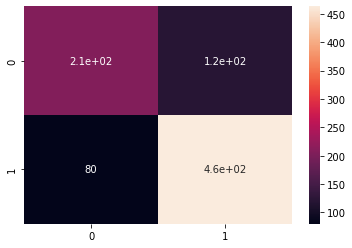

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original,predictions)
sns.heatmap(cm,annot = True)